# **Importing the Libraries**
---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

# **Visualize the Raw Data**
---

In [2]:
path = "D:\\PyCharm_Project\\Gas_Classification\\WTD_upload\\Acetaldehyde_500\\L1\\201107250806_board_setPoint_400V_fan_setPoint_000_mfc_setPoint_Acetaldehyde_500ppm_p1"

In [3]:
def visualize_data(path):
    df = pd.read_table(path)
    data = df
    
    drop_list = [8,16,24,32,40,48,56,64]
    
    data1 = data.drop(data.columns[0:13], axis=1)
    
    for a in drop_list:
        data1 = data1.drop(data1.columns[a], axis=1)
    
    # Give column name
    data1.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','B1','B2','B3','B4','B5','B6','B7','B8','C1','C2','C3','C4','C5','C6','C7','C8','D1','D2','D3','D4','D5','D6','D7','D8','E1','E2','E3','E4','E5','E6','E7','E8','F1','F2','F3','F4','F5','F6','F7','F8','G1','G2','G3','G4','G5','G6','G7','G8','H1','H2','H3','H4','H5','H6','H7','H8','I1','I2','I3','I4','I5','I6','I7','I8']
    
    # Give index name
    abc = 0
    data1 = data1.rename(index = lambda abc:abc+1)
    
    x_list = list(df['0'])
    y_list = data1.to_numpy().tolist()
    
    uniform_data = data1[2200:18200]
    
    normalized_df=(data1-0)/(4096-0)
    uni_data = normalized_df.transpose()
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(uni_data, interpolation ='none', aspect = 'auto', cmap='viridis')
    fig.colorbar(im)
    
    plt.title("Heatmap of Chemical Sample", size=16)
    plt.tight_layout()
    plt.show()

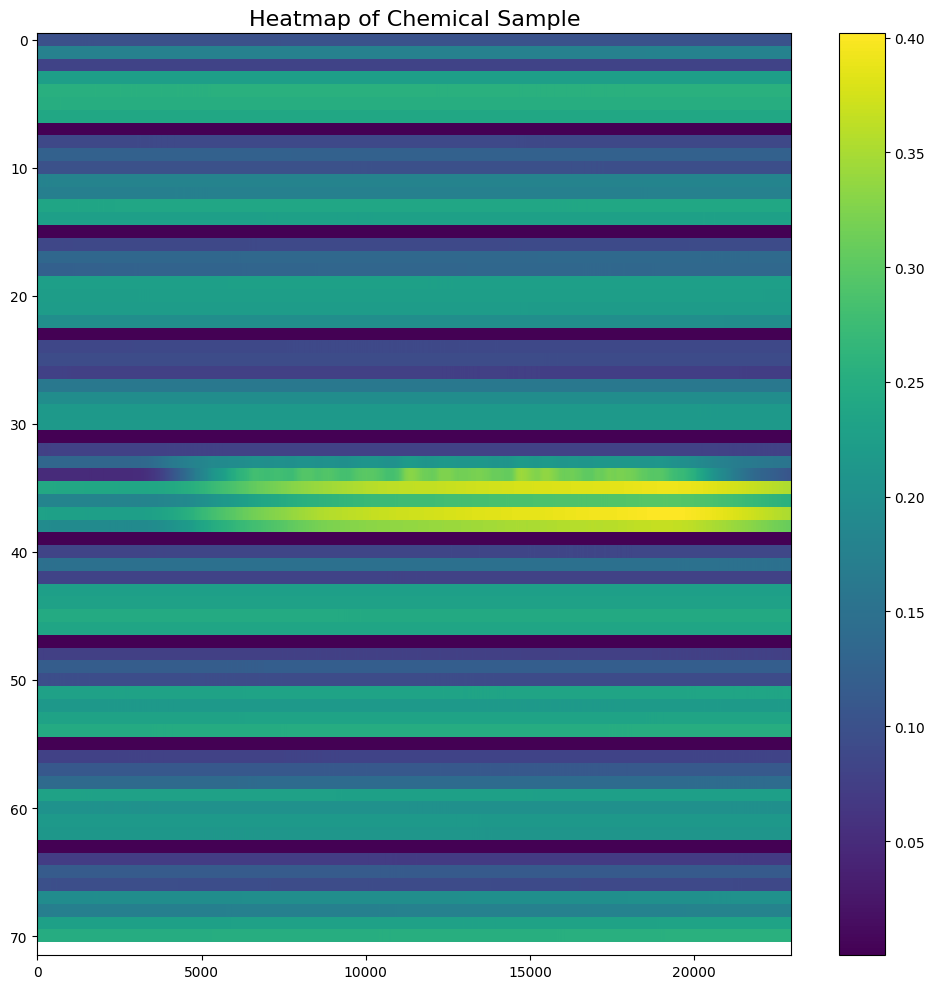

In [4]:
visualize_data(path)

# **Dataset Preprocesing**
---

In [5]:
def dataset_columns(path):
    drop_list = [9, 18, 27, 36, 45, 54, 63, 72, 81]
    columns_name = ['T', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
                'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
                'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8',
                'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
                'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8',
                'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8',
                'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8']
    
    dtype = {str(i): float for i in range(100)}  # Assuming there are 100 columns
    df = pd.read_table(path, dtype=dtype)
    
    df = df.drop(df.columns[1:12], axis=1)
    df = df.drop(df.columns[drop_list], axis=1)
    df.columns = columns_name
    
    # Convert 'T' column to timedelta
    df['T'] = pd.to_timedelta(df['T'], unit='ms')
    
    # Filter 'T' values
    df = df[(df['T'] > pd.Timedelta(2000, unit='ms')) & (df['T'] < pd.Timedelta(200000, unit='ms'))]
    
    # Resample and fill NaN values
    df = df.set_index('T').resample('500ms').max().bfill()
    df = (df - 0) / (4096 - 0)

    new_df = df[df.columns].agg(['mean', 'std', 'min', 'max'])
    new_df = new_df.T.unstack().to_frame().T
    
    new_df.columns = new_df.columns.map('_'.join)
    new_df['Chemical'] = 'None'
    
    return new_df.columns

In [6]:
def dataset_preprocessing(path, c_name):
    drop_list = [9, 18, 27, 36, 45, 54, 63, 72, 81]
    columns_name = ['T', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
                'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
                'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8',
                'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
                'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8',
                'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8',
                'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8']
    
    dtype = {str(i): float for i in range(100)}  # Assuming there are 100 columns
    df = pd.read_table(path, dtype=dtype)
    
    df = df.drop(df.columns[1:12], axis=1)
    df = df.drop(df.columns[drop_list], axis=1)
    df.columns = columns_name
    
    # Convert 'T' column to timedelta
    df['T'] = pd.to_timedelta(df['T'], unit='ms')
    
    # Filter 'T' values
    df = df[(df['T'] > pd.Timedelta(2000, unit='ms')) & (df['T'] < pd.Timedelta(200000, unit='ms'))]
    
    # Resample and fill NaN values
    df = df.set_index('T').resample('500ms').max().bfill()
    df = (df - 0) / (4096 - 0)

    new_df = df[df.columns].agg(['mean', 'std', 'min', 'max'])
    new_df = new_df.T.unstack().to_frame().T
    
    new_df.columns = new_df.columns.map('_'.join)
    new_df['Chemical'] = c_name
    
    new_df_array = new_df.to_numpy()
    
    return new_df_array

In [7]:
dataset_columns = dataset_columns(path)
dataset_columns

Index(['mean_A1', 'mean_A2', 'mean_A3', 'mean_A4', 'mean_A5', 'mean_A6',
       'mean_A7', 'mean_A8', 'mean_B1', 'mean_B2',
       ...
       'max_H8', 'max_I1', 'max_I2', 'max_I3', 'max_I4', 'max_I5', 'max_I6',
       'max_I7', 'max_I8', 'Chemical'],
      dtype='object', length=289)

In [8]:
DIR_NAME = "D:\PyCharm_Project\Gas_Classification\WTD_upload"
file_paths = []

# Locate the dataset directory
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        file_paths.append(path)
             
print('done')

done


In [9]:
file_paths[7200]

'D:\\PyCharm_Project\\Gas_Classification\\WTD_upload\\Butanol_100\\L1\\201108080851_board_setPoint_400V_fan_setPoint_000_mfc_setPoint_Butanol_100ppm_p1'

In [10]:
numpy_array = file_paths
# Target string
target_string = "201105301622"
target_string2 = "201105311620"

# Find occurrences of the target string
indices = np.char.find(numpy_array, target_string2)

# Get indices where the target string is found
found_indices = np.where(indices != -1)[0]

if len(found_indices) > 0:
    print(f"The string '{target_string}' was found at indices: {found_indices}")
else:
    print(f"The string '{target_string}' was not found in the numpy array.")

The string '201105301622' was not found in the numpy array.


In [11]:
DIR_NAME = "D:\PyCharm_Project\Gas_Classification\WTD_upload"
file_paths = []
dataset = np.array([])

# Count the total number of files
total_files = sum(len(files) for _, _, files in os.walk(DIR_NAME))

# Initialize tqdm outside the loop
progress_bar = tqdm(total=total_files)

# Locate the dataset directory
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
        # Extract the chemical absolute path 
        path = os.path.join(dirname, filename)
        # Extract the chemical name from the directory path
        chemical_name = os.path.basename(os.path.dirname(dirname))

        # print('path name:', path)
        # print('chemical_name:', chemical_name)

        new_data = dataset_preprocessing(path, chemical_name)
        if dataset.size == 0:
            dataset = new_data
        else:
            dataset = np.concatenate((dataset, new_data), axis=0)
            
        # Increment the progress bar
        progress_bar.update(1)
  
progress_bar.close()      
print('done')

100%|██████████| 17921/17921 [1:01:09<00:00,  4.88it/s]

done


In [12]:
dataset

array([[0.11027449790877525, 0.10077397510258838, 0.17731637665719696,
        ..., 0.232177734375, 0.253662109375, 'Acetaldehyde_500'],
       [0.11490268899936869, 0.11778490471117424, 0.18796978574810605,
        ..., 0.22509765625, 0.246826171875, 'Acetaldehyde_500'],
       [0.11813755228061869, 0.12888775449810605, 0.1951972113715278,
        ..., 0.2109375, 0.2314453125, 'Acetaldehyde_500'],
       ...,
       [0.1006161468197601, 0.11287373244160354, 0.17417768998579544,
        ..., 0.2001953125, 0.220703125, 'Toluene_200'],
       [0.10645394373421717, 0.12804004399463384, 0.18528855449021464,
        ..., 0.18994140625, 0.2099609375, 'Toluene_200'],
       [0.11441502426609848, 0.14445418540877525, 0.19779089725378787,
        ..., 0.177734375, 0.196533203125, 'Toluene_200']], dtype=object)

In [13]:
new_df = pd.DataFrame(dataset)
new_df.columns = dataset_columns
new_df.tail()

,mean_A1,mean_A2,mean_A3,mean_A4,mean_A5,mean_A6,mean_A7,mean_A8,mean_B1,mean_B2,...,max_H8,max_I1,max_I2,max_I3,max_I4,max_I5,max_I6,max_I7,max_I8,Chemical
17916,0.090209,0.081975,0.152585,0.091519,0.197655,0.22411,0.221826,0.213248,0.059393,0.079737,...,0.204102,0.075195,0.07666,0.117676,0.118408,0.185303,0.160889,0.217041,0.238281,Toluene_200
17917,0.096285,0.098654,0.164511,0.109453,0.197884,0.225689,0.212466,0.204733,0.065996,0.102331,...,0.197021,0.078613,0.09082,0.125,0.135986,0.176025,0.152588,0.204834,0.226318,Toluene_200
17918,0.100616,0.112874,0.174178,0.129559,0.185512,0.212349,0.199964,0.193657,0.071461,0.117418,...,0.18335,0.080078,0.095947,0.127686,0.146729,0.170166,0.147461,0.200195,0.220703,Toluene_200
17919,0.106454,0.12804,0.185289,0.151214,0.175583,0.201057,0.188939,0.183624,0.077144,0.129645,...,0.171387,0.084473,0.106445,0.134521,0.160645,0.162598,0.140869,0.189941,0.209961,Toluene_200
17920,0.114415,0.144454,0.197791,0.173428,0.167633,0.191448,0.17964,0.174871,0.085349,0.145381,...,0.161133,0.088379,0.117188,0.140625,0.181152,0.152588,0.13208,0.177734,0.196533,Toluene_200


In [14]:
new_df.to_csv('D:\\PyCharm_Project\\Gas_Classification\\output2.csv')